<a href="https://colab.research.google.com/github/dhanashrihogale23/dhanashri_23-Codsoft_project/blob/main/Task3_codsoft_Iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix




In [ ]:
df=pd.read_csv("Iris.csv")
df_points=df.iloc[:, 1:4]
labels = df.iloc[:, 4]

**first five rows of this dataset**

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#dimensions
print(f'''No of rows:{df.shape[0]}
No of Columns: {df.shape[1]}''')

No of rows:150
No of Columns: 5


**view the info of the data frame that contains details like the count of non-null variables and the column's datatype along with the column names.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**If there are any missing values,then modify them before using the dataset.For modifying you can use the fillna()method.It will fill null values**

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

we can see that all values are 0 .It means that there are no null values entire the dataframe.
The target labels of this dataset are present in the species column,let's have a quick look at the target labels.

**Visualizations**

**View the count plot of Species feature using Seaborn.**

In [ ]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<Axes: >

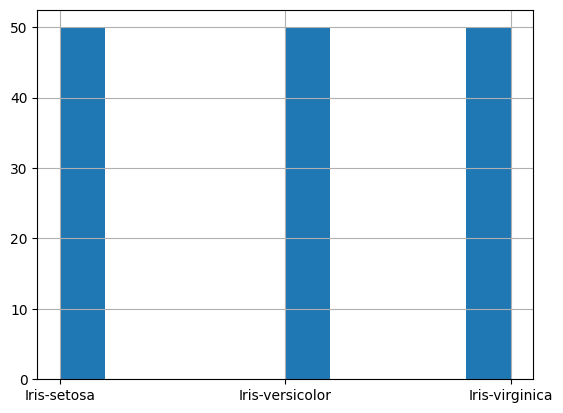

In [ ]:
df['species'].hist()

In [ ]:
import plotly.express as px
fig = px.scatter(df,x = "sepal_length",y="sepal_width",color = "species")
fig.show()

Text(0.5, 1.0, 'Distribution of Measurements')

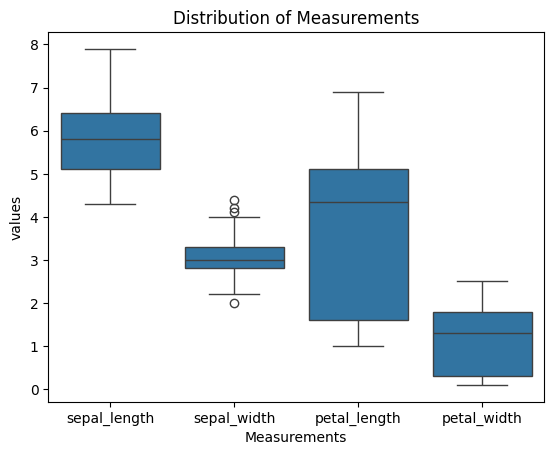

In [ ]:
#distribution of the variables
df1 = df.drop('species',axis=1).melt(value_vars=df.drop('species',axis=1).columns)
sns.boxplot(df1,x='variable',y='value')
plt.xlabel('Measurements')
plt.ylabel('values')
plt.title('Distribution of Measurements')

In [ ]:
#forming x and y
x = df.drop('species',axis=1)
y = df['species']

In [ ]:
 #train-test split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101,stratify=y)
print(f'''x Train:{x_train.shape}
x Test:{x_test.shape}
y Train:{y_train.shape}
y Test:{y_test.shape}''')



x Train:(120, 4)
x Test:(30, 4)
y Train:(120,)
y Test:(30,)


In [ ]:
# scaling

preprocess =  Pipeline([

     ('scaler',StandardScaler())

])

# model

model = Pipeline([
    ('preprocess', preprocess),
    ('classifier', LogisticRegression(multi_class='multinomial'))
])
model.fit(x_train,y_train)

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('classifier', LogisticRegression(multi_class='multinomial'))])

In [ ]:
#prediction
y_pred = model.predict(x_test)
y_pred




array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

Text(0.5, 1.0, 'Confusion Matrix for the classification')

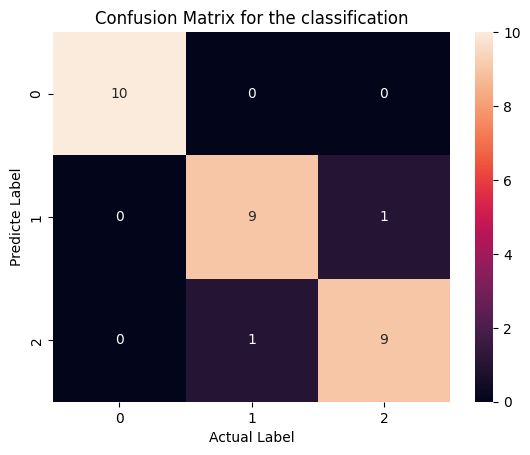

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Label')
plt.ylabel('Predicte Label')
plt.title('Confusion Matrix for the classification')

In [ ]:
# classification
cr = classification_report(y_test,y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



Text(0.5, 0, 'Species (Encoded)')

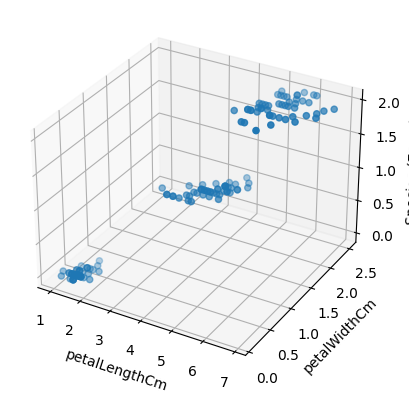

In [ ]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.petal_length, df.petal_width, df.species_encoded)
ax.set_xlabel('petalLengthCm')
ax.set_ylabel('petalWidthCm')
ax.set_zlabel('Species (Encoded)')

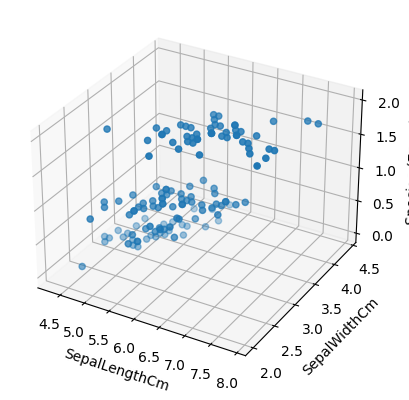

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.sepal_length, df.sepal_width, df.species_encoded)
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('Species (Encoded)')

plt.show()

**Thus 3-D plot gives us the glimpse of species of iris flower is more inclined towards the variables petal length and petal width**

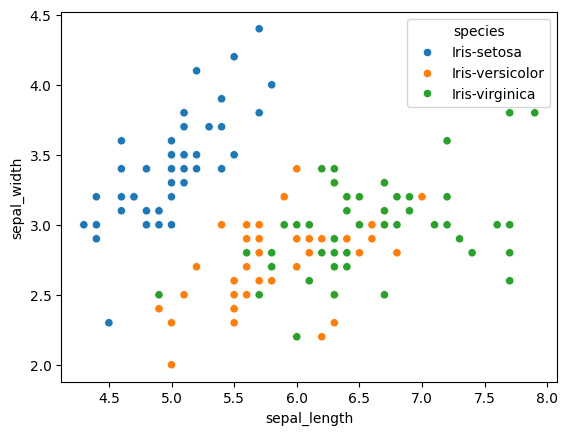

In [ ]:
sns.scatterplot(data=df,x="sepal_length",y="sepal_width",hue="species");

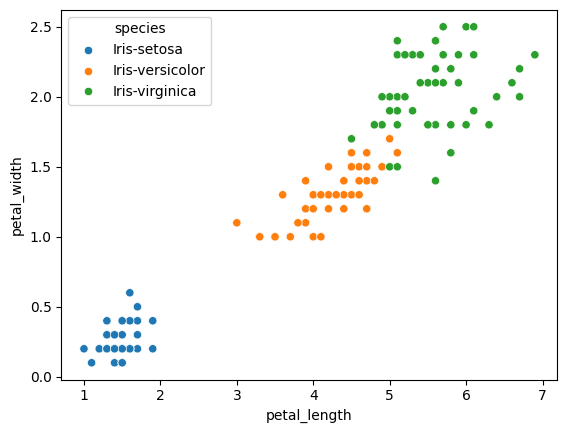

In [ ]:
sns.scatterplot(data=df,x="petal_length",y="petal_width",hue="species");

**Applying Elbow Technique**

In [ ]:
k_rng = range(1,10)
sse=[]
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['petal_length','petal_width']])
  sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
sse

[550.6434666666669,
 86.40394533571003,
 31.38775897435897,
 19.499400899685114,
 13.999613141025636,
 11.084846431864285,
 9.219714009661839,
 7.640593062579722,
 6.648828607340372]

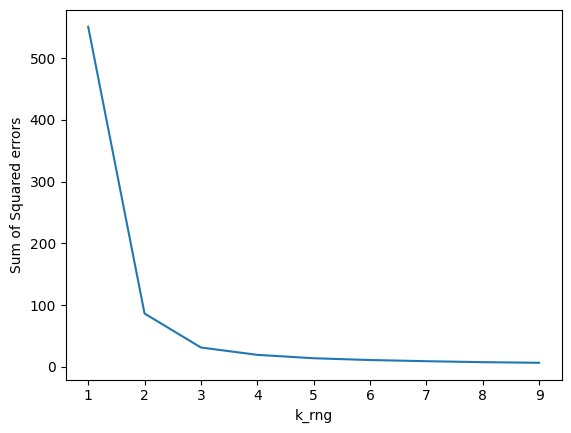

In [ ]:
plt.xlabel('k_rng')
plt.ylabel("Sum of Squared errors")
plt.plot(k_rng,sse)

In [ ]:
km = KMeans(n_clusters=3,random_state=0,)
y_predicted = km.fit_predict(df[['petal_length','petal_width']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,1
146,6.3,2.5,5.0,1.9,Iris-virginica,2,1
147,6.5,3.0,5.2,2.0,Iris-virginica,2,1
148,6.2,3.4,5.4,2.3,Iris-virginica,2,1
